In [1]:
import glob, re, h5py
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# functions for reading dycore data
def read_Dycore_data(filepath, print_var=False):
    with h5py.File(filepath, "r") as f:
        if print_var:
            print("Available variables:", list(f.keys()))
        q   = f["grid_tracers_c_xyzt"][:]
        t   = f["LRF"][:, :, :, :]
    return q, t

def _extract_day(fp):
    m = re.search(r"_startfrom_(\d+)day", fp)
    return int(m.group(1)) if m else -1

def read_dycore_series(pattern):
    # find & sort
    files = sorted(glob.glob(pattern), key=_extract_day)[-20:]

    q_all = []
    t_all = []
    for i, fp in enumerate(files):
        q_tmp, t_tmp = read_Dycore_data(fp, print_var=(i==0))
        q_all.append(q_tmp)
        t_all.append(t_tmp)
        print(f'finished reading {fp}')

    q_all   = np.concatenate(q_all, axis=0)
    t_all   = np.concatenate(t_all, axis=0)
    return q_all, t_all

In [3]:
q, t = read_Dycore_data("/data92/garywu/LRFws/HSt42_20_ws500d_gLRF_LW_200_sst2.5K/data/RH80_L20_1500day_startfrom_1400day.h5")

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.73627424e-05 -7.65177579e-05 -6.28418107e-05 -5.51823749e-05
 -4.47365134e-05 -4.74283216e-05 -4.12297883e-05 -3.95042797e-05
 -3.33401986e-05 -2.70820885e-05 -1.27015421e-05  3.07876549e-06
  2.32960865e-05  3.83437184e-05  1.93126914e-05 -6.59878157e-07]


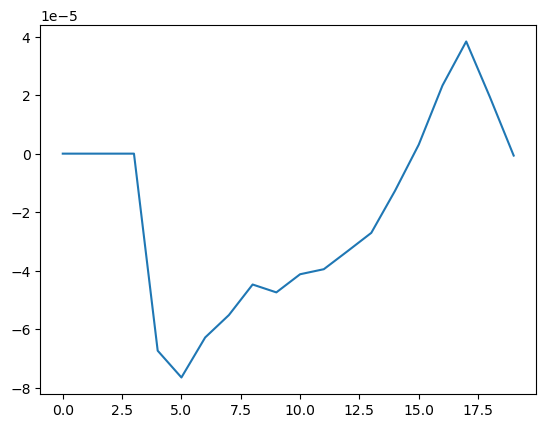

In [4]:
plt.plot(t[-1, :, 32, 32])
print(t[-1, :, 32, 32])